# Contour plot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import folium
from folium.plugins import MarkerCluster, HeatMap
from folium import Marker

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [4]:
df_map = pd.read_csv(r"results\df_map_final.csv")
df_map = df_map.round(3)
df_map

StationName     lat      lon        date  Avg_Soil_TP05_TempC  \
0    Drifting River  51.358 -100.361  2019-10-30                3.043   
1    Drifting River  51.358 -100.361  2019-10-31                2.783   
2    Drifting River  51.358 -100.361  2019-11-01                2.402   
3            Baldur  49.356  -99.248  2019-10-30                1.413   
4            Baldur  49.356  -99.248  2019-10-31                1.080   
..              ...     ...      ...         ...                  ...   
250         McAuley  50.182 -101.424  2019-10-31                0.961   
251         McAuley  50.182 -101.424  2019-11-01                0.878   
252          Birtle  50.411 -100.893  2019-10-30                0.588   
253          Birtle  50.411 -100.893  2019-10-31                0.538   
254          Birtle  50.411 -100.893  2019-11-01                0.536   

     Avg_Soil_TP05_TempC_predicted  Avg_Soil_TP20_TempC  \
0                            1.259                4.430   
1                           -0.613                4.228   
2                           -3.101                3.873   
3                            1.527                6.275   
4                            1.274                5.996   
..                             ...                  ...   
250                         -1.188                3.628   
251                         -3.462                3.435   
252                          0.812                5.053   
253                         -1.246                4.825   
254                         -3.379                4.739   

     Avg_Soil_TP20_TempC_predicted  Avg_Soil_TP50_TempC  \
0                            5.627                6.186   
1                            5.358                6.008   
2                            4.870                5.841   
3                            5.936                6.362   
4                            6.021                6.163   
..                             ...                  ...   
250                          5.685                4.952   
251                          4.862                4.730   
252                          5.711                5.241   
253                          5.549                5.058   
254                          4.668                4.896   

     Avg_Soil_TP50_TempC_predicted  Avg_Soil_TP100_TempC  \
0                            2.246                 6.743   
1                            4.224                 6.600   
2                            4.212                 6.461   
3                            2.796                 7.474   
4                            4.687                 7.366   
..                             ...                   ...   
250                          4.330                 7.163   
251                          4.311                 6.999   
252                          2.411                 6.491   
253                          3.904                 6.377   
254                          3.893                 6.250   

     Avg_Soil_TP100_TempC_predicted  
0                             2.396  
1                             2.396  
2                             2.396  
3                             2.737  
4                             2.737  
..                              ...  
250                           2.419  
251                           2.419  
252                           2.127  
253                           2.127  
254                           2.127  

[255 rows x 12 columns]

## Base map

In [5]:
df_base_map = df_map[["StationName", "lat", "lon"]]
df_base_map = df_base_map.drop_duplicates().reset_index(drop = True)
df_base_map

StationName     lat      lon
0   Drifting River  51.358 -100.361
1           Baldur  49.356  -99.248
2         Rorketon  51.333  -99.493
3        Woodlands  50.161  -97.712
4           Arborg  50.904  -97.273
..             ...     ...      ...
80            Kane  49.355  -97.704
81         Oakburn  50.595 -100.672
82            Rosa  49.242  -96.814
83         McAuley  50.182 -101.424
84          Birtle  50.411 -100.893

[85 rows x 3 columns]

In [6]:
#, tiles = "stamentoner"
sw = [49.152433, -102.185820]
ne = [59.511477, -88.217413]
winnipeg = (49.900497437,-97.139312744)
base_map = folium.Map(location = winnipeg, zoom_start=4.7, min_zoom=4.7)
base_map.fit_bounds([sw,ne])
def PlotDot(point):
    folium.CircleMarker(location = [point.lat, point.lon],
                        radius = 0.5,
                        tooltip=f'<b>station_name: </b>{str(point["StationName"])}'
                                f'<br></br>'f'<b>location: </b>{str(point[["lat", "lon"]].tolist())}',
                        popup=f'<b>station_name: </b>{str(point["StationName"])}'
                              f'<br></br>'f'<b>location: </b>{str(point[["lat", "lon"]].tolist())}',
                        fill_color = "#000000"
                        ).add_to(base_map)
df_base_map.apply(PlotDot, axis=1)
base_map

## Input: date, variable:

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [8]:
scaler = MinMaxScaler()
df_map

StationName     lat      lon        date  Avg_Soil_TP05_TempC  \
0    Drifting River  51.358 -100.361  2019-10-30                3.043   
1    Drifting River  51.358 -100.361  2019-10-31                2.783   
2    Drifting River  51.358 -100.361  2019-11-01                2.402   
3            Baldur  49.356  -99.248  2019-10-30                1.413   
4            Baldur  49.356  -99.248  2019-10-31                1.080   
..              ...     ...      ...         ...                  ...   
250         McAuley  50.182 -101.424  2019-10-31                0.961   
251         McAuley  50.182 -101.424  2019-11-01                0.878   
252          Birtle  50.411 -100.893  2019-10-30                0.588   
253          Birtle  50.411 -100.893  2019-10-31                0.538   
254          Birtle  50.411 -100.893  2019-11-01                0.536   

     Avg_Soil_TP05_TempC_predicted  Avg_Soil_TP20_TempC  \
0                            1.259                4.430   
1                           -0.613                4.228   
2                           -3.101                3.873   
3                            1.527                6.275   
4                            1.274                5.996   
..                             ...                  ...   
250                         -1.188                3.628   
251                         -3.462                3.435   
252                          0.812                5.053   
253                         -1.246                4.825   
254                         -3.379                4.739   

     Avg_Soil_TP20_TempC_predicted  Avg_Soil_TP50_TempC  \
0                            5.627                6.186   
1                            5.358                6.008   
2                            4.870                5.841   
3                            5.936                6.362   
4                            6.021                6.163   
..                             ...                  ...   
250                          5.685                4.952   
251                          4.862                4.730   
252                          5.711                5.241   
253                          5.549                5.058   
254                          4.668                4.896   

     Avg_Soil_TP50_TempC_predicted  Avg_Soil_TP100_TempC  \
0                            2.246                 6.743   
1                            4.224                 6.600   
2                            4.212                 6.461   
3                            2.796                 7.474   
4                            4.687                 7.366   
..                             ...                   ...   
250                          4.330                 7.163   
251                          4.311                 6.999   
252                          2.411                 6.491   
253                          3.904                 6.377   
254                          3.893                 6.250   

     Avg_Soil_TP100_TempC_predicted  
0                             2.396  
1                             2.396  
2                             2.396  
3                             2.737  
4                             2.737  
..                              ...  
250                           2.419  
251                           2.419  
252                           2.127  
253                           2.127  
254                           2.127  

[255 rows x 12 columns]

In [9]:
DEM = df_map[df_map["date"] == "2019-10-30"].reset_index(drop = True)[["lon","lat","Avg_Soil_TP05_TempC"]]
DEM = DEM.rename(columns = {"lon":"longitude", "lat":"latitude","Avg_Soil_TP05_TempC": "elevation"})
DEM
DEM = DEM.to_csv("DEM.csv", index=True, header=True)

In [10]:
# def HeatMape(date, param):    
#     df = df_map[df_map["date"] == date]

#     df = df[["StationName", "lat", "lon", param]].reset_index(drop = True)
#     df["frequency"] = scaler.fit_transform(df[[param]].values) * 1000
#     df.frequency = df.frequency.round()
#     df = df.reindex(df.index.repeat(df["frequency"]))
#     heat_map = HeatMap(data = df[["lat", "lon"]], radius=15, gradient={
#                                                                           '0': 'Navy',
#                                                                           '0.25': 'Blue',
#                                                                           '0.5': 'Green',
#                                                                           '0.75': 'Yellow',
#                                                                           '1': 'Red'
#                                                                         })
#     def PlotDot(point):
#         folium.CircleMarker(location = [point.lat, point.lon],
#                             radius = 0.5,
#                             tooltip=f'<b>station_name: </b>{str(point["StationName"])}'
#                                     f'<br></br>'f'<b>{param}: </b>{str(point[param])} </b>C',
#                              popup=f'<b>station_name: </b>{str(point["StationName"])}'
#                               f'<br></br>'f'<b>{param}: </b>{str(point[param])} </b>C',
#                             fill_color = "#000000"

#                             ).add_to(base_map)
#     df.drop_duplicates(subset = ["StationName"]).apply(PlotDot, axis=1)
#     heat_map.add_to(base_map)
#     return (base_map)

In [11]:
import folium
import branca
from folium import plugins
from scipy.interpolate import griddata
import geojsoncontour
import scipy as sp
import scipy.ndimage

In [12]:
df_map[df_map["date"] == "2019-10-31"]

StationName     lat      lon        date  Avg_Soil_TP05_TempC  \
1    Drifting River  51.358 -100.361  2019-10-31                2.783   
4            Baldur  49.356  -99.248  2019-10-31                1.080   
7          Rorketon  51.333  -99.493  2019-10-31                2.011   
10        Woodlands  50.161  -97.712  2019-10-31                1.856   
13           Arborg  50.904  -97.273  2019-10-31                0.850   
..              ...     ...      ...         ...                  ...   
241            Kane  49.355  -97.704  2019-10-31                0.321   
244         Oakburn  50.595 -100.672  2019-10-31                1.018   
247            Rosa  49.242  -96.814  2019-10-31                1.432   
250         McAuley  50.182 -101.424  2019-10-31                0.961   
253          Birtle  50.411 -100.893  2019-10-31                0.538   

     Avg_Soil_TP05_TempC_predicted  Avg_Soil_TP20_TempC  \
1                           -0.613                4.228   
4                            1.274                5.996   
7                           -0.221                5.049   
10                           1.223                4.883   
13                          -0.121                3.965   
..                             ...                  ...   
241                          2.107                4.429   
244                         -1.499                3.174   
247                          2.300                6.194   
250                         -1.188                3.628   
253                         -1.246                4.825   

     Avg_Soil_TP20_TempC_predicted  Avg_Soil_TP50_TempC  \
1                            5.358                6.008   
4                            6.021                6.163   
7                            5.281                6.043   
10                           5.796                7.146   
13                           5.711                5.962   
..                             ...                  ...   
241                          6.103                6.441   
244                          5.681                5.941   
247                          6.421                6.504   
250                          5.685                4.952   
253                          5.549                5.058   

     Avg_Soil_TP50_TempC_predicted  Avg_Soil_TP100_TempC  \
1                            4.224                 6.600   
4                            4.687                 7.366   
7                            4.278                 7.112   
10                           5.361                 7.982   
13                           4.950                 7.388   
..                             ...                   ...   
241                          5.558                 7.966   
244                          3.484                 6.323   
247                          5.848                 8.370   
250                          4.330                 7.163   
253                          3.904                 6.377   

     Avg_Soil_TP100_TempC_predicted  
1                             2.396  
4                             2.737  
7                             2.230  
10                            3.339  
13                            2.909  
..                              ...  
241                           3.195  
244                           1.730  
247                           3.375  
250                           2.419  
253                           2.127  

[85 rows x 12 columns]

In [13]:
def HeatMape(date, param):    
    
    sw = [49.152433, -102.185820]
    ne = [59.511477, -88.217413]
    winnipeg = (49.900497437,-97.139312744)
    base_map = folium.Map(location = winnipeg, zoom_start=4.7, min_zoom=4.7, tiles='openstreetmap')
    base_map.fit_bounds([sw,ne])
    def PlotDot(point):
        folium.CircleMarker(location = [point.lat, point.lon],
                        radius = 0.5,
                        tooltip=f'<b>station_name: </b>{str(point["StationName"])}'
                                f'<br></br>'f'<b>location: </b>{str(point[["lat", "lon"]].tolist())}',
                        popup=f'<b>station_name: </b>{str(point["StationName"])}'
                              f'<br></br>'f'<b>location: </b>{str(point[["lat", "lon"]].tolist())}',
                        fill_color = "#000000"
                        ).add_to(base_map)
    df_base_map.apply(PlotDot, axis=1)

    
    
    
    
    df = df_map[df_map["date"] == date]
    
    DEM = df[["lon", "lat",param]]
    DEM = DEM.rename(columns= {"lon":"longitude", "lat":"latitude"})
    
    # Setup minimum and maximum values for the contour lines
    vmin = DEM[param].min() 
    vmax = DEM[param].max()
    
    # Setup colormap
    colors = ['navy','blue','royalblue','darkgreen','orange','red']
#     ['blue','royalblue', 'navy','pink',  'mediumpurple',  'darkorchid',  'plum',  'm', 'mediumvioletred', 'palevioletred', 'crimson',
#          'magenta','pink','red','yellow','orange', 'brown','green', 'darkgreen']
    levels = len(colors)
    cm = branca.colormap.LinearColormap(colors, vmin=vmin, vmax=vmax).to_step(levels)
    
    # Convertion from dataframe to array
    x = np.asarray(DEM.longitude.tolist())
    y = np.asarray(DEM.latitude.tolist())
    z = np.asarray(DEM[param].tolist())
    
    # Make a grid
    x_arr = np.linspace(np.min(x), np.max(x), 500)
    y_arr = np.linspace(np.min(y), np.max(y), 500)
    x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)
    
    # Grid the param
    z_mesh = griddata((x, y), z, (x_mesh, y_mesh), method='cubic')
    
    # Use Gaussian filter to smoothen the contour
#     sigma = [5, 5]
#     z_mesh = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')
    
    # Create the contour
    contourf = plt.contourf(x_mesh, y_mesh, z_mesh, levels, alpha=0.5, colors=colors, linestyles='None', vmin=vmin, vmax=vmax)
    
    # Convert matplotlib contourf to geojson
    geojson = geojsoncontour.contourf_to_geojson(
    contourf=contourf,
    min_angle_deg=3.0,
    ndigits=5,
    stroke_width=1,
    fill_opacity=0.1)
    
     
    # Set up the map placeholdder
    folium.GeoJson(
    geojson,
    style_function=lambda x: {
        'color':     x['properties']['stroke'],
        'weight':    x['properties']['stroke-width'],
        'fillColor': x['properties']['fill'],
        'opacity':   0.5,
    }).add_to(base_map)
    
    variable = param.split("_")[1]
    depth = param.split("_")[2]
    
    # Add the colormap to the folium map for legend
    variable = param.split("_")[1]
    depth = param.split("_")[2].split("P")[1]
    cm.caption = f"Date: {date} -- Average {variable} temperature at {depth} cm"  
    base_map.add_child(cm)
    
    
    df = df[["StationName", "lat", "lon", param]].reset_index(drop = True)
    df["frequency"] = scaler.fit_transform(df[[param]].values) * 1000
    df.frequency = df.frequency.round()
    df = df.reindex(df.index.repeat(df["frequency"]))
    heat_map = HeatMap(data = df[["lat", "lon"]], radius=15, gradient={
                                                                          '0': 'Navy',
                                                                          '0.25': 'Blue',
                                                                          '0.5': 'Green',
                                                                          '0.75': 'Yellow',
                                                                          '1': 'Red'
                                                                        })
    def PlotDot(point):
        folium.CircleMarker(location = [point.lat, point.lon],
                            radius = 0.5,
                            tooltip=f'<b>station_name: </b>{str(point["StationName"])}'
                                    f'<br></br>'f'<b>{param}: </b>{str(point[param])} </b>C',
                             popup=f'<b>station_name: </b>{str(point["StationName"])}'
                              f'<br></br>'f'<b>{param}: </b>{str(point[param])} </b>C',
                            fill_color = "#000000"

                            ).add_to(base_map)
    df.drop_duplicates(subset = ["StationName"]).apply(PlotDot, axis=1)
    heat_map.add_to(base_map)
    plugins.Fullscreen(position='topright', force_separate_button=True).add_to(base_map)
    base_map.save(f'data/folium_contour_temperature_map.html')
    return (base_map)

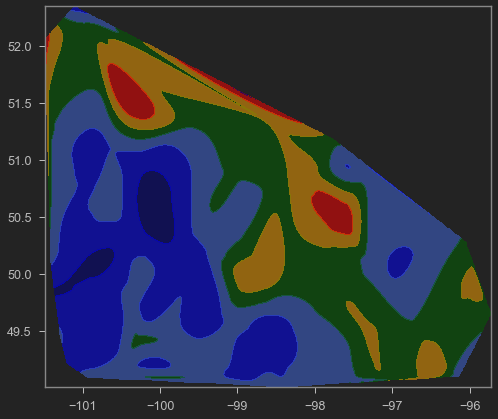

In [14]:
heatmap = HeatMape("2019-10-30", "Avg_Soil_TP05_TempC")
heatmap
 

# clustered, input: date, variable

In [15]:
df = df_map[df_map["date"] == "2019-10-30"][["lat", "lon"]]
df

lat      lon
0    51.358 -100.361
3    49.356  -99.248
6    51.333  -99.493
9    50.161  -97.712
12   50.904  -97.273
..      ...      ...
240  49.355  -97.704
243  50.595 -100.672
246  49.242  -96.814
249  50.182 -101.424
252  50.411 -100.893

[85 rows x 2 columns]

C:\Users\siava\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


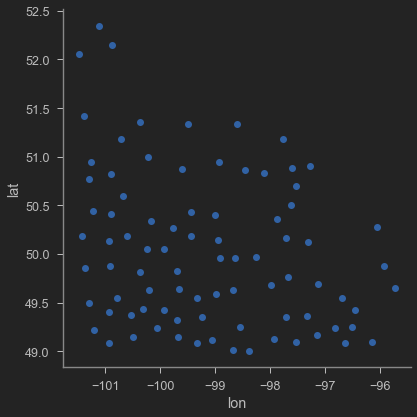

In [16]:
sns.lmplot(x = "lon", y="lat", data=df,fit_reg=False,size = 6, aspect = 1)

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [18]:
X = df
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,25) 


for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

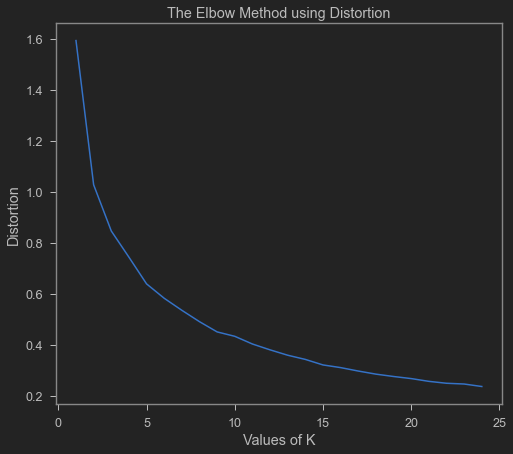

In [19]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

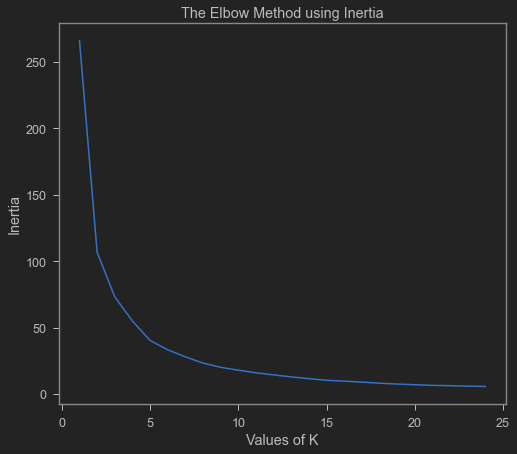

In [20]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

In [21]:
Kmeans = KMeans(n_clusters = 20)

In [22]:
Kmeans.fit(df)

KMeans(n_clusters=20)

In [23]:
Kmeans.cluster_centers_

array([[  50.9575    , -101.04066667],
       [  49.2192    ,  -97.5262    ],
       [  50.34133333,  -99.29266667],
       [  49.35366667, -100.949     ],
       [  49.9095    ,  -97.2105    ],
       [  50.76728571,  -97.68342857],
       [  49.8578    ,  -98.8304    ],
       [  49.27633333,  -96.53766667],
       [  52.18266667, -101.16066667],
       [  51.047     ,  -98.65833333],
       [  50.097     , -100.34275   ],
       [  51.1755    , -100.294     ],
       [  49.9475    ,  -99.76225   ],
       [  49.33657143, -100.05142857],
       [  49.27725   ,  -99.23825   ],
       [  49.93433333,  -95.89833333],
       [  50.152     , -101.12983333],
       [  49.89475   ,  -97.9035    ],
       [  51.104     ,  -99.5475    ],
       [  49.08966667,  -98.53266667]])

In [24]:
df["cluster"] = Kmeans.labels_
df

lat      lon  cluster
0    51.358 -100.361       11
3    49.356  -99.248       14
6    51.333  -99.493       18
9    50.161  -97.712       17
12   50.904  -97.273        5
..      ...      ...      ...
240  49.355  -97.704        1
243  50.595 -100.672        0
246  49.242  -96.814        7
249  50.182 -101.424       16
252  50.411 -100.893       16

[85 rows x 3 columns]

C:\Users\siava\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


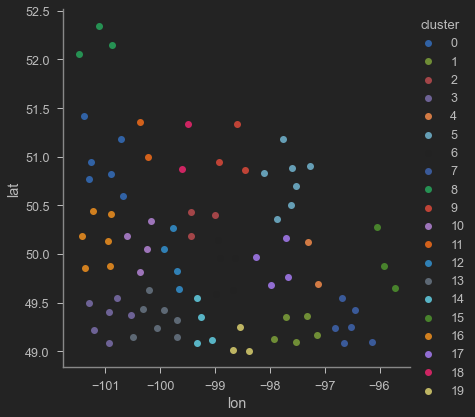

In [25]:
sns.lmplot(x = "lon", y="lat", data=df,fit_reg=False,size = 6, aspect = 1, hue = "cluster")

In [26]:
df_map_clustered = df_map.merge(df, on = ["lat", "lon"])[["StationName","date" ,"lat", "lon", "cluster", 
                                       "Avg_Soil_TP05_TempC", "Avg_Soil_TP05_TempC_predicted",
                                       "Avg_Soil_TP20_TempC", "Avg_Soil_TP20_TempC_predicted", 
                                       "Avg_Soil_TP50_TempC", "Avg_Soil_TP50_TempC_predicted",
                                      "Avg_Soil_TP100_TempC", "Avg_Soil_TP100_TempC_predicted"]]
df_map_clustered

StationName        date     lat      lon  cluster  \
0    Drifting River  2019-10-30  51.358 -100.361       11   
1    Drifting River  2019-10-31  51.358 -100.361       11   
2    Drifting River  2019-11-01  51.358 -100.361       11   
3            Baldur  2019-10-30  49.356  -99.248       14   
4            Baldur  2019-10-31  49.356  -99.248       14   
..              ...         ...     ...      ...      ...   
250         McAuley  2019-10-31  50.182 -101.424       16   
251         McAuley  2019-11-01  50.182 -101.424       16   
252          Birtle  2019-10-30  50.411 -100.893       16   
253          Birtle  2019-10-31  50.411 -100.893       16   
254          Birtle  2019-11-01  50.411 -100.893       16   

     Avg_Soil_TP05_TempC  Avg_Soil_TP05_TempC_predicted  Avg_Soil_TP20_TempC  \
0                  3.043                          1.259                4.430   
1                  2.783                         -0.613                4.228   
2                  2.402                         -3.101                3.873   
3                  1.413                          1.527                6.275   
4                  1.080                          1.274                5.996   
..                   ...                            ...                  ...   
250                0.961                         -1.188                3.628   
251                0.878                         -3.462                3.435   
252                0.588                          0.812                5.053   
253                0.538                         -1.246                4.825   
254                0.536                         -3.379                4.739   

     Avg_Soil_TP20_TempC_predicted  Avg_Soil_TP50_TempC  \
0                            5.627                6.186   
1                            5.358                6.008   
2                            4.870                5.841   
3                            5.936                6.362   
4                            6.021                6.163   
..                             ...                  ...   
250                          5.685                4.952   
251                          4.862                4.730   
252                          5.711                5.241   
253                          5.549                5.058   
254                          4.668                4.896   

     Avg_Soil_TP50_TempC_predicted  Avg_Soil_TP100_TempC  \
0                            2.246                 6.743   
1                            4.224                 6.600   
2                            4.212                 6.461   
3                            2.796                 7.474   
4                            4.687                 7.366   
..                             ...                   ...   
250                          4.330                 7.163   
251                          4.311                 6.999   
252                          2.411                 6.491   
253                          3.904                 6.377   
254                          3.893                 6.250   

     Avg_Soil_TP100_TempC_predicted  
0                             2.396  
1                             2.396  
2                             2.396  
3                             2.737  
4                             2.737  
..                              ...  
250                           2.419  
251                           2.419  
252                           2.127  
253                           2.127  
254                           2.127  

[255 rows x 13 columns]

In [27]:
#, tiles = "stamentoner"
df_base_map_clustered = df_map_clustered[["lat", "lon", "cluster"]].groupby(by = "cluster").mean()
sw = [49.152433, -102.185820]
ne = [59.511477, -88.217413]
winnipeg = (49.900497437,-97.139312744)
base_map_clustered = folium.Map(location = winnipeg, zoom_start=50, min_zoom=4.7)
base_map_clustered.fit_bounds([sw,ne])
def PlotDot(point):
    folium.CircleMarker(location = [point.lat, point.lon],
                        radius = 0.5).add_to(base_map_clustered)
df_base_map_clustered.apply(PlotDot, axis=1)
base_map_clustered

In [28]:
df_map_clustered[df_map_clustered["date"] == "2019-10-30"].groupby(by = "cluster").mean()

lat         lon  Avg_Soil_TP05_TempC  \
cluster                                               
0        50.957500 -101.040667             1.148667   
1        49.219200  -97.526200             1.754400   
2        50.341333  -99.292667             1.108000   
3        49.353667 -100.949000             0.606500   
4        49.909500  -97.210500             1.632500   
5        50.767286  -97.683429             2.294429   
6        49.857800  -98.830400             1.965000   
7        49.276333  -96.537667             2.071167   
8        52.182667 -101.160667             1.952000   
9        51.047000  -98.658333             2.116667   
10       50.097000 -100.342750             0.525500   
11       51.175500 -100.294000             1.706000   
12       49.947500  -99.762250             0.442000   
13       49.336571 -100.051429             1.171143   
14       49.277250  -99.238250             0.896250   
15       49.934333  -95.898333             2.092667   
16       50.152000 -101.129833             0.428667   
17       49.894750  -97.903500             2.007250   
18       51.104000  -99.547500             1.277000   
19       49.089667  -98.532667             0.943667   

         Avg_Soil_TP05_TempC_predicted  Avg_Soil_TP20_TempC  \
cluster                                                       
0                             0.878500             3.207500   
1                             2.025200             4.761600   
2                             1.473333             3.546667   
3                             1.135833             3.386667   
4                             1.948000             4.725000   
5                             1.597286             4.678286   
6                             1.566200             4.509800   
7                             2.047000             5.213833   
8                             1.243333             3.735333   
9                             1.520000             5.663333   
10                            1.140750             3.447000   
11                            1.309500             3.715000   
12                            1.297000             3.439500   
13                            1.386143             3.911143   
14                            1.443000             4.398750   
15                            1.890667             5.012000   
16                            0.921667             4.208000   
17                            1.958000             4.479250   
18                            1.495000             4.824500   
19                            1.448667             4.033000   

         Avg_Soil_TP20_TempC_predicted  Avg_Soil_TP50_TempC  \
cluster                                                       
0                             5.538500             5.669000   
1                             7.478000             6.981800   
2                             5.684333             5.831000   
3                             5.716833             5.865167   
4                             7.519000             7.111500   
5                             6.289571             6.417143   
6                             5.782600             5.922200   
7                             7.353667             6.596333   
8                             5.547667             5.536333   
9                             5.796000             6.025667   
10                            5.683250             5.972750   
11                            5.635000             5.312000   
12                            5.780500             5.243250   
13                            5.800571             6.138429   
14                            5.931250             5.985750   
15                            7.089333             7.108667   
16                            5.671500             5.397167   
17                            7.068750             6.558250   
18                            5.941000             7.201000   
19                            5.740667             6.013667   

         Avg_Soil_TP50_TempC_p

In [29]:
def HeatMape_clustered(date, param):    
    df = df_map_clustered[df_map_clustered["date"] == date].groupby(by = "cluster").mean()
    df = df[["lat", "lon", param]].reset_index(drop = True)
    df["frequency"] = scaler.fit_transform(df[[param]].values) * 1000
    df.frequency = df.frequency.round()
    df[param] = df[param].round(2)
    df = df.reindex(df.index.repeat(df["frequency"]))
    heat_map = HeatMap(data = df[["lat", "lon"]], radius=25)
    def PlotDot(point):
        folium.CircleMarker(location = [point.lat, point.lon],
                            radius = 0.5,
                            tooltip=f'<b>{param}: </b>{str(point[param])} </b>C',
                            popup=f'<b>{param}: </b>{str(point[param])} </b>C',
                            fill_color = "#000000"

                            ).add_to(base_map_clustered)
    df.drop_duplicates().drop("frequency", axis = 1).apply(PlotDot, axis=1)
    heat_map.add_to(base_map_clustered)
    return base_map_clustered

In [30]:
heat_map_clustered = HeatMape_clustered("2019-10-30", "Avg_Soil_TP05_TempC")
heat_map_clustered

# Presentation

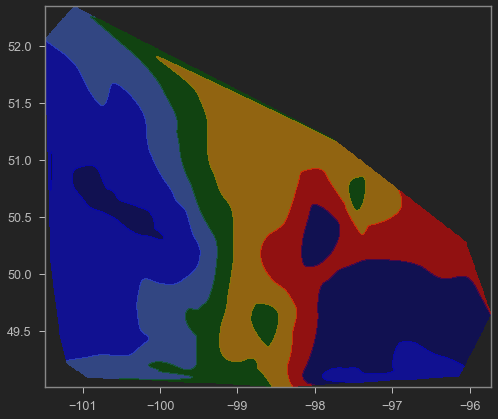

In [31]:
heatmap = HeatMape("2019-11-01", "Avg_Soil_TP05_TempC_predicted")
heatmap

In [32]:
heat_map_clustered = HeatMape_clustered("2019-10-30", "Avg_Soil_TP05_TempC")
heat_map_clustered